<center>

# **Remote Sensing Datasets: Access and Download for Area of Interest**  
### **PEER2PEER GEE Training**  
**Developed by:** Muhammad Umar Akbar, Annika Hjelmstand, Debora Yumi de Oliveira  
**Affiliation:** Department of Biosystems and Agricultural Engineering, Oklahoma State University  

</center>

---

## **Introduction**

Welcome to this Google Earth Engine (GEE) training notebook! In this guide, we will walk you through the process of accessing, visualizing, and downloading various remote sensing datasets available in the Google Earth Engine Data Catalog.

Remote sensing provides valuable insights into environmental and agricultural monitoring, hydrology, climate studies, and land management. This notebook will cover key datasets, including:

- **Elevation** (Digital Elevation Models - DEMs)  
- **Land Use Land Cover** (LULC)  
- **Precipitation** (Rainfall estimates)  
- **Soil Moisture**  
- **Temperature** (Land Surface Temperature)  
- **Surface & Groundwater datasets**  

By the end of this tutorial, you will be able to:

- ✅ Access datasets from GEE’s extensive catalog.  
- ✅ Visualize them interactively over your area of interest (AOI).  
- ✅ Download the data for further analysis.  

---

## **1. Import necessary libraries**

In [1]:
import ee
import geemap

## **2. Authenticate and initialize Earth Engine**

In [2]:
ee.Authenticate()
ee.Initialize(project="ee-mumarakbarwaince") # replace the project ID with yours

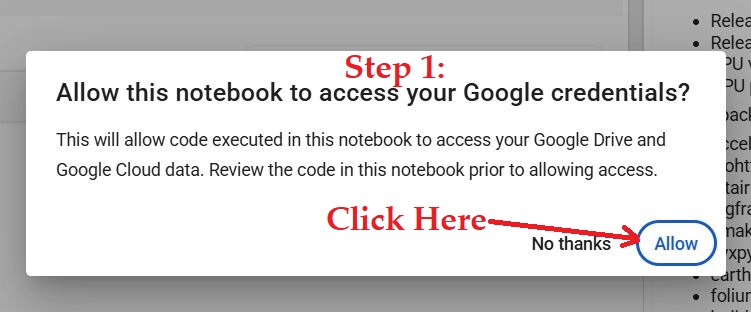

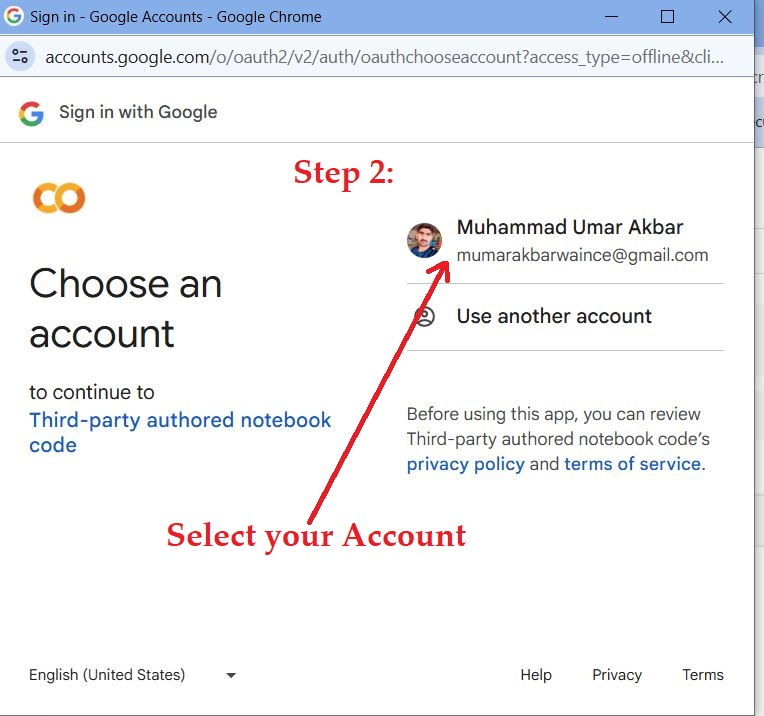

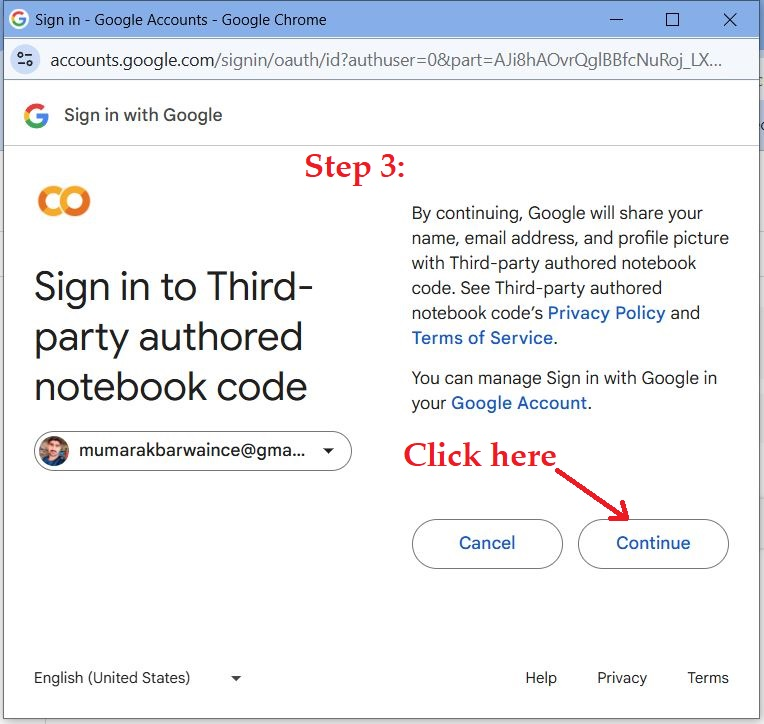

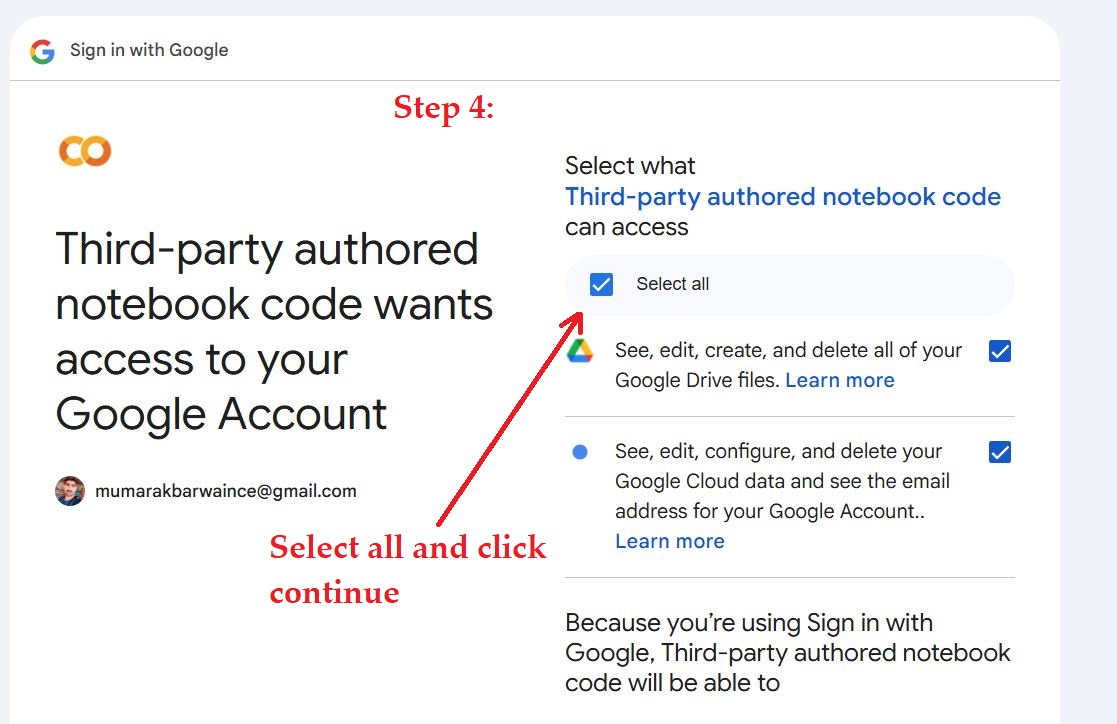

## **3. NASA SRTM Digital Elevation Model (30m)**

The Shuttle Radar Topography Mission (SRTM, see Farr et al. 2007) digital elevation data is an international research effort that obtained digital elevation models on a near-global scale. This **SRTM V3 product (SRTM Plus)** is provided by **NASA JPL** at a resolution of **1 arc-second (approximately 30m)**.

This dataset has undergone a **void-filling process** using open-source data sources such as **ASTER GDEM2, GMTED2010**, and **NED**, as opposed to other versions that contain voids or have been filled with commercial sources.

---

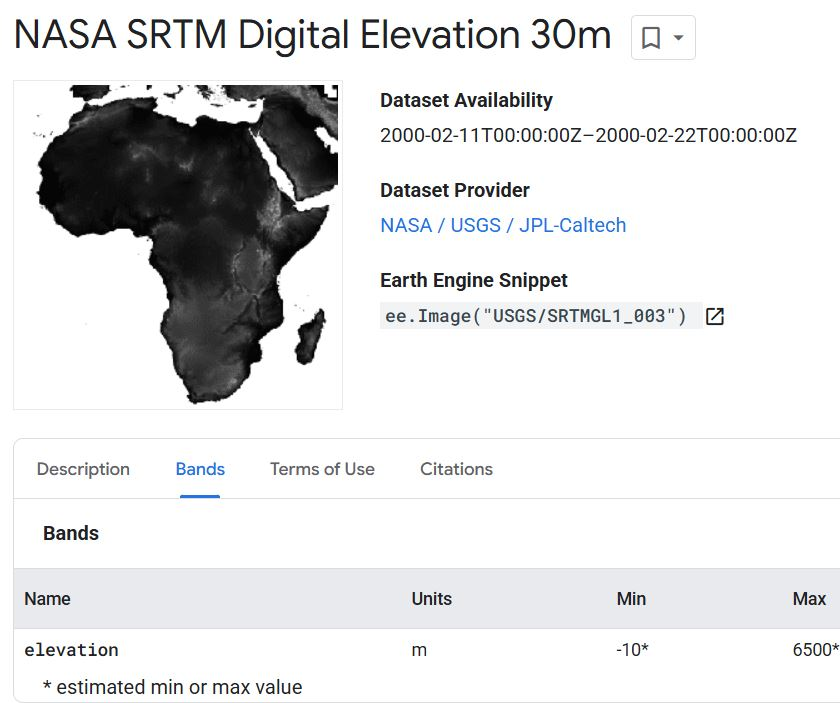

In [3]:
# Load the SRTM 30m DEM
dem = ee.Image("USGS/SRTMGL1_003")

# Define a rectangle AOI in Tanzania
aoi = ee.Geometry.Rectangle([33.0, -4.5, 34.5, -3.0])  # Adjust coordinates as needed

# Visualization parameters
vis_params = {
    'min': 1000,
    'max': 1600,
    'palette': ['white', 'green', 'brown']
}

# Create interactive map and display DEM
Map = geemap.Map()
Map.centerObject(aoi, 9)
Map.addLayer(dem.clip(aoi), vis_params, 'SRTM Elevation - Tanzania')
Map

Map(center=[-3.750105771031063, 33.750000000000064], controls=(WidgetControl(options=['position', 'transparent…

## **4. ESA WorldCover 10m Land Cover Map – 2021**

The **European Space Agency (ESA) WorldCover 10 m 2021** product provides a global land cover map at a high spatial resolution of **10 meters**, derived from **Sentinel-1 and Sentinel-2** satellite data. This dataset includes **11 distinct land cover classes** and was developed as part of the **ESA WorldCover project**, under the **5th Earth Observation Envelope Programme (EOEP-5)**.

The **WorldCover 2021 v200** version delivers improved classification and thematic detail, achieving an **overall accuracy of 76.7%**. This product is especially valuable for applications in environmental monitoring, land use planning, and ecosystem assessment on both global and regional scales.


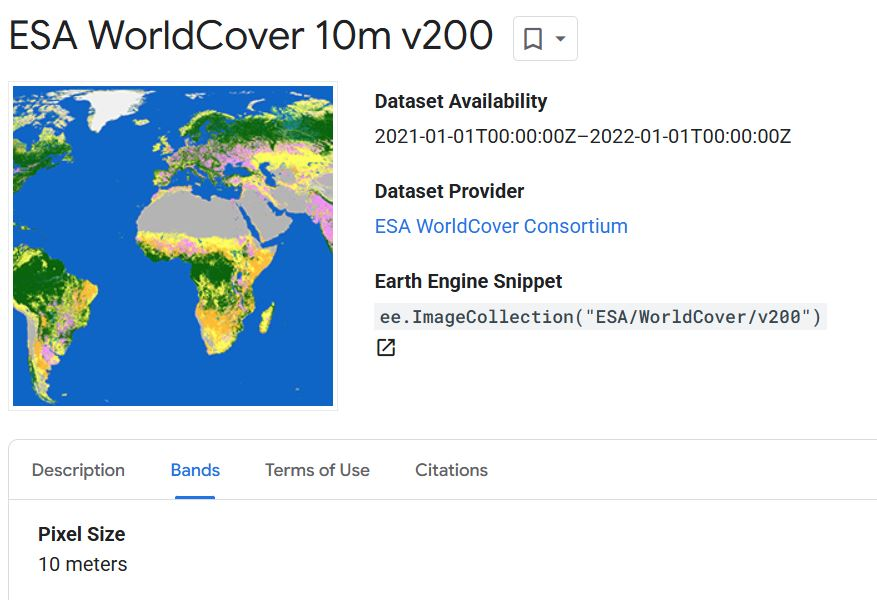

In [4]:
# Load the ESA WorldCover v200 dataset and get the first image
dataset = ee.ImageCollection('ESA/WorldCover/v200').first()

# Clip the dataset to AOI
dataset_clipped = dataset.clip(aoi)

In [5]:
# Define visualization parameters
visualization = { 'bands': ['Map']}

# Create and display the map
Map.addLayer(dataset_clipped, visualization, 'ESA WorldCover v200 - Clipped')
Map.addLayerControl()
Map

Map(bottom=67202.0, center=[-3.750105771031063, 33.750000000000064], controls=(WidgetControl(options=['positio…

### **5. CHIRPS: Rainfall Estimates from Rain Gauge and Satellite Observations**

The **Climate Hazards Group InfraRed Precipitation with Station data (CHIRPS)** is a long-term, high-resolution rainfall dataset developed to support drought early warning and climate monitoring efforts. Covering the region from **50°S to 50°N** globally and extending from **1981 to the near-present**, CHIRPS blends multiple data sources including satellite-based infrared imagery, in-situ rain gauge observations, and a high-resolution climatology known as **CHPclim**.

With a spatial resolution of **0.05° (~5 km)**, CHIRPS provides gridded rainfall time series ideal for **trend analysis, drought assessment, and seasonal forecasting**. The dataset was developed in collaboration with the **USGS Earth Resources Observation and Science (EROS) Center**, aiming to provide consistent, reliable, and near-real-time precipitation data for regions with limited ground-based observations.


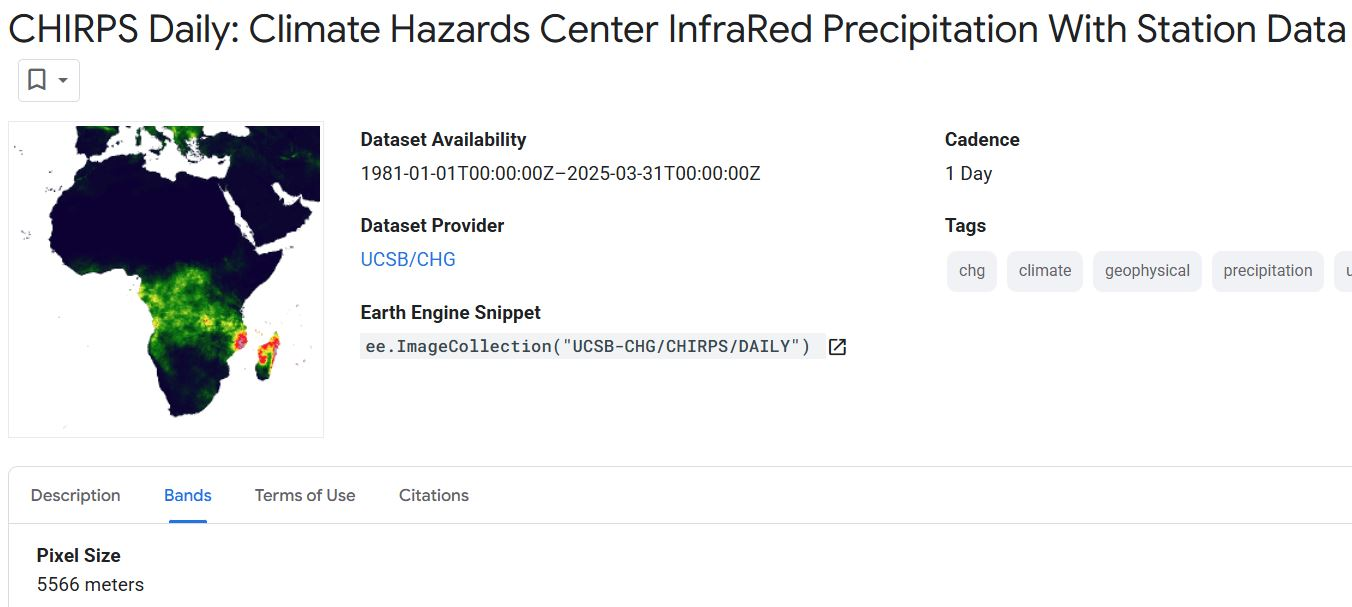

In [6]:
# Load CHIRPS daily data and filter for the year 2018
chirps = ee.ImageCollection('UCSB-CHG/CHIRPS/DAILY') \
    .filterDate('2018-01-01', '2018-12-31') \
    .filterBounds(aoi)

# Select the precipitation band and sum over the year
yearly_precip = chirps.select('precipitation').sum().clip(aoi)

In [7]:
# Visualization parameters
precip_vis = {
    'min': 650,
    'max': 1400,
    'palette': ['001137', '0aab1e', 'e7eb05', 'ff4a2d', 'e90000'],
}

# Create map and add layer
Map.addLayer(yearly_precip, precip_vis, 'CHIRPS Yearly Rainfall (2018)')
Map

Map(bottom=67202.0, center=[-3.750105771031063, 33.750000000000064], controls=(WidgetControl(options=['positio…

### **6. MODIS Land Surface Temperature and Emissivity (MOD11A1 V6.1) – Daily Global 1km**

The **MOD11A1 V6.1** product provides **daily land surface temperature (LST)** and **emissivity** data at a spatial resolution of **1 km**, organized into a 1200 × 1200 km global grid. The LST values are derived from the **MOD11_L2 swath product**, which utilizes thermal infrared measurements from the **MODIS instrument** onboard NASA’s Terra satellite.

In regions above **30° latitude**, pixels may include **multiple clear-sky observations** within a day. When this occurs, the dataset returns the **average value** of all qualifying measurements for that pixel. The product includes both **daytime and nighttime LST bands**, their associated **quality assurance layers**, as well as **MODIS thermal bands 31 and 32** and **six observation layers** that provide additional context on viewing geometry and cloud cover conditions.

This dataset is useful for a wide range of applications including climate monitoring, evapotranspiration modeling, and land-atmosphere interaction studies.


In [11]:
# Load MODIS MOD11A1 V6.1 Land Surface Temperature dataset
dataset = ee.ImageCollection('MODIS/061/MOD11A1') \
    .filterDate('2018-01-01', '2018-05-01') \
    .filterBounds(aoi)

# Select the daytime LST band, calculate mean, apply scale factor, and clip to AOI
lst_day = dataset.select('LST_Day_1km').mean().multiply(0.02).clip(aoi)

In [12]:
# Visualization parameters
lst_vis = {
    'min': 13000.0,
    'max': 16500.0,
    'palette': [
        '040274', '040281', '0502a3', '0502b8', '0502ce', '0502e6',
        '0602ff', '235cb1', '307ef3', '269db1', '30c8e2', '32d3ef',
        '3be285', '3ff38f', '86e26f', '3ae237', 'b5e22e', 'd6e21f',
        'fff705', 'ffd611', 'ffb613', 'ff8b13', 'ff6e08', 'ff500d',
        'ff0000', 'de0101', 'c21301', 'a71001', '911003'
    ]
}

# Create the interactive map
Map.addLayer(lst_day, lst_vis, 'LST Daytime (MODIS) Jan–May 2018')
Map

Map(bottom=33765.0, center=[-3.823148557391301, 33.78611716696021], controls=(WidgetControl(options=['position…

### **7. SMAP: Soil Moisture Active Passive Mission**

The **Soil Moisture Active Passive (SMAP)** mission is a NASA satellite observatory designed to measure the amount of water in the top 5 cm of soil across the globe. Launched in **January 2015** and operational since **April 2015**, SMAP provides vital data for understanding the water, energy, and carbon cycles. Although its **radar instrument failed** shortly after launch, the **radiometer** continues to deliver high-quality global soil moisture data.

SMAP collects measurements **every 2–3 days**, enabling the detection of dynamic soil moisture changes driven by weather events, seasonal variation, and climatic shifts. These observations are crucial for applications such as **agriculture, drought monitoring, flood forecasting**, and **climate modeling**. The mission completed its **prime 3-year phase in 2018** and continues to operate in an extended mission phase, providing an invaluable dataset for hydrological and environmental research.


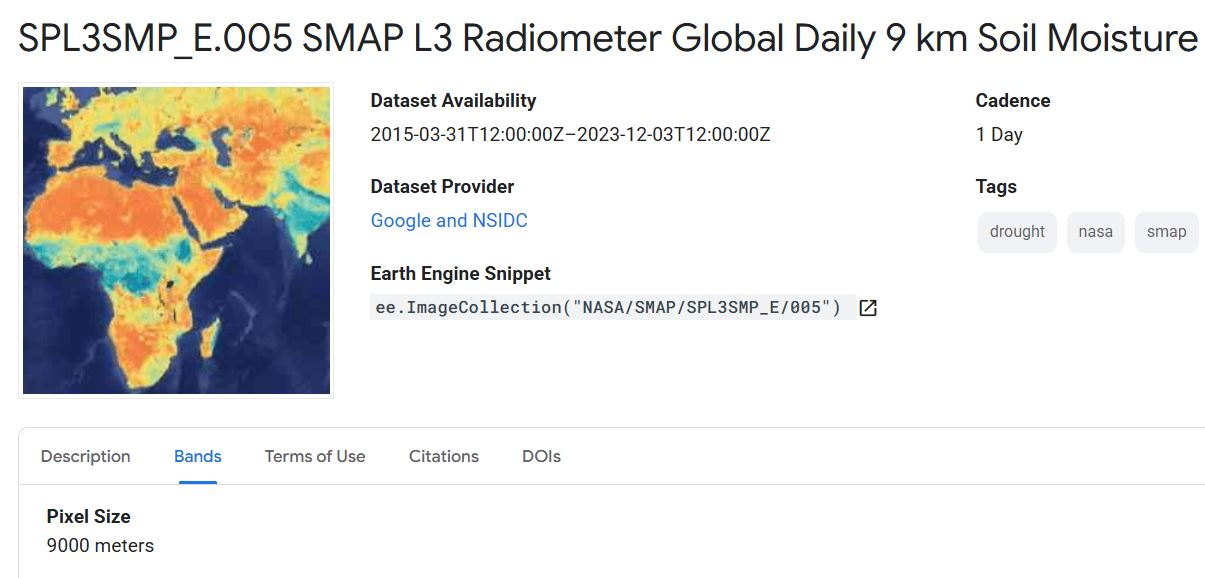

In [18]:
# Load SMAP SPL3SMP_E dataset and filter by date
dataset = ee.ImageCollection('NASA/SMAP/SPL3SMP_E/005') \
    .filterDate('2017-04-01', '2017-04-30') \
    .filterBounds(aoi)

# Select the AM surface soil moisture band and take mean
soil_moisture_am = dataset.select('soil_moisture_am').mean().clip(aoi)

In [19]:
# Visualization parameters
soil_moisture_vis = {
    'min': 0.1,
    'max': 0.3,
    'palette': ['0300ff', '418504', 'efff07', 'efff07', 'ff0303']
}

# Create and display the map
Map.addLayer(soil_moisture_am, soil_moisture_vis, 'SMAP Soil Moisture AM (Apr 2017)')
Map

Map(bottom=33765.0, center=[-3.825889022828324, 33.788715159602276], controls=(WidgetControl(options=['positio…

### **8. Downloading Datasets to Google Drive**

### **Downloading Datasets to Google Drive**

- After processing remote sensing datasets in **Google Earth Engine (GEE)**, you can export the results to **Google Drive** using the `Export.image.toDrive()` function in Python.

This export function allows you to save a processed image (e.g., soil moisture, precipitation, elevation, or temperature) as a **GeoTIFF file**.

Key parameters in the export function include:
  - **`image`**: The Earth Engine image you want to export (e.g., mean soil moisture for April 2017).
  - **`description`**: A name for the export task (used for monitoring).
  - **`folder`**: The name of the folder in your **Google Drive** where the file will be saved.
  - **`fileNamePrefix`**: The name for the output file.
  - **`region`**: The area of interest (**AOI**) to clip the export to.
  - **`scale`**: Spatial resolution of the export (should match the native resolution of the dataset).
  - **`crs`**: Coordinate Reference System (e.g., `'EPSG:4326'` for geographic lat/lon).

- Once these parameters are defined, you can start the export by calling `task.start()`.

- The exported file will appear in your **Google Drive** under the specified folder once processing is complete.

This method is useful for downloading processed datasets for offline analysis, creating maps in GIS software, or sharing with collaborators.



In [20]:
# Export the image to your Google Drive
task = ee.batch.Export.image.toDrive(
    image=soil_moisture_am,
    description='SMAP_SoilMoisture_Apr2017',
    folder='EarthEngineExports',  # Your Drive folder name
    fileNamePrefix='SMAP_SoilMoisture_Tanzania_Apr2017',
    region=aoi,
    scale=10000,  # SMAP native resolution ~10 km
    crs='EPSG:4326',
    maxPixels=1e13
)

# Start the export task
task.start()

print("Export started. Check Google Drive > EarthEngineExports folder.")

Export started. Check Google Drive > EarthEngineExports folder.


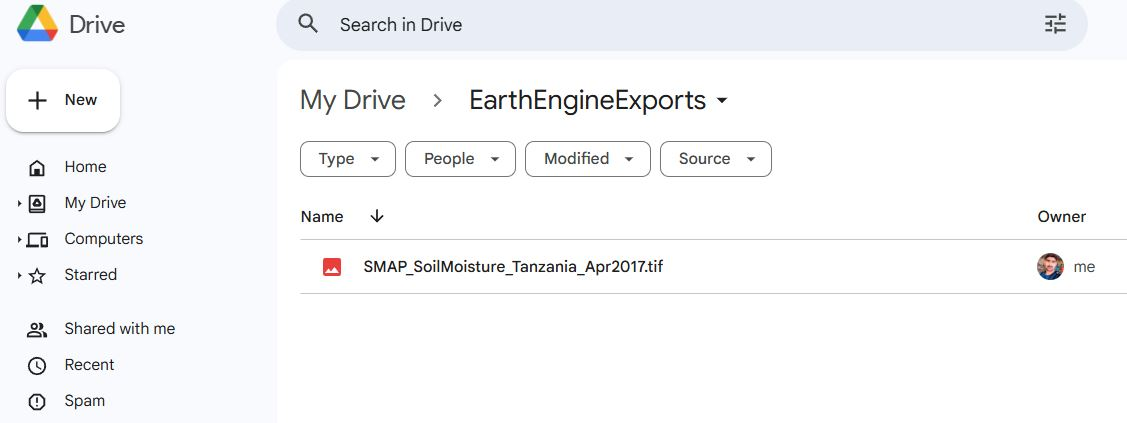